In [39]:
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.metrics import Precision, Recall
import os
import zipfile

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

## Data Preparation and Visualization

In this part of the project, we prepare our dataset for training and validation. We have two sets of images: one for training and another for validation. Each set contains images of dogs and cats. The images are stored in zip files, which we first need to extract.

In [2]:
local_zip = 'Classification/training_set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('Classification/training_set')
local_zip = 'Classification/validation_set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('Classification/validation_set')
zip_ref.close()

In [3]:
train_dogs_dir = os.path.join('Classification/training_set/training_set/dogs')

train_cats_dir = os.path.join('Classification/training_set/training_set/cats')

validation_dogs_dir = os.path.join('Classification/validation_set/validation_set/dogs')

validation_cats_dir = os.path.join('Classification/validation_set/validation_set/cats')

In [4]:
train_dogs_names = os.listdir(train_dogs_dir)
print(train_dogs_names[:10])

train_cats_names = os.listdir(train_cats_dir)
print(train_cats_names[:10])

validation_dogs_hames = os.listdir(validation_dogs_dir)
print(validation_dogs_hames[:10])

validation_cats_names = os.listdir(validation_cats_dir)
print(validation_cats_names[:10])

['dog.1005.jpg', 'dog.2381.jpg', 'dog.727.jpg', 'dog.1923.jpg', 'dog.1522.jpg', 'dog.865.jpg', 'dog.3167.jpg', 'dog.3180.jpg', 'dog.3851.jpg', 'dog.1576.jpg']
['cat.2375.jpg', 'cat.1763.jpg', 'cat.393.jpg', 'cat.2427.jpg', 'cat.2497.jpg', 'cat.3411.jpg', 'cat.2523.jpg', 'cat.3838.jpg', 'cat.3715.jpg', 'cat.1218.jpg']
['dog.4973.jpg', 'dog.4799.jpg', 'dog.4529.jpg', 'dog.4066.jpg', 'dog.4559.jpg', 'dog.4866.jpg', 'dog.4035.jpg', 'dog.4857.jpg', 'dog.4964.jpg', 'dog.4550.jpg']
['cat.4557.jpg', 'cat.4816.jpg', 'cat.4768.jpg', 'cat.4212.jpg', 'cat.4424.jpg', 'cat.4724.jpg', 'cat.4866.jpg', 'cat.4028.jpg', 'cat.4817.jpg', 'cat.4216.jpg']


In [5]:
print('total training dogs images:', len(os.listdir(train_dogs_dir)))
print('total training cats images:', len(os.listdir(train_cats_dir)))
print('total validation dogs images:', len(os.listdir(validation_dogs_dir)))
print('total validation cats images:', len(os.listdir(validation_cats_dir)))

total training dogs images: 4001
total training cats images: 4001
total validation dogs images: 1001
total validation cats images: 1001


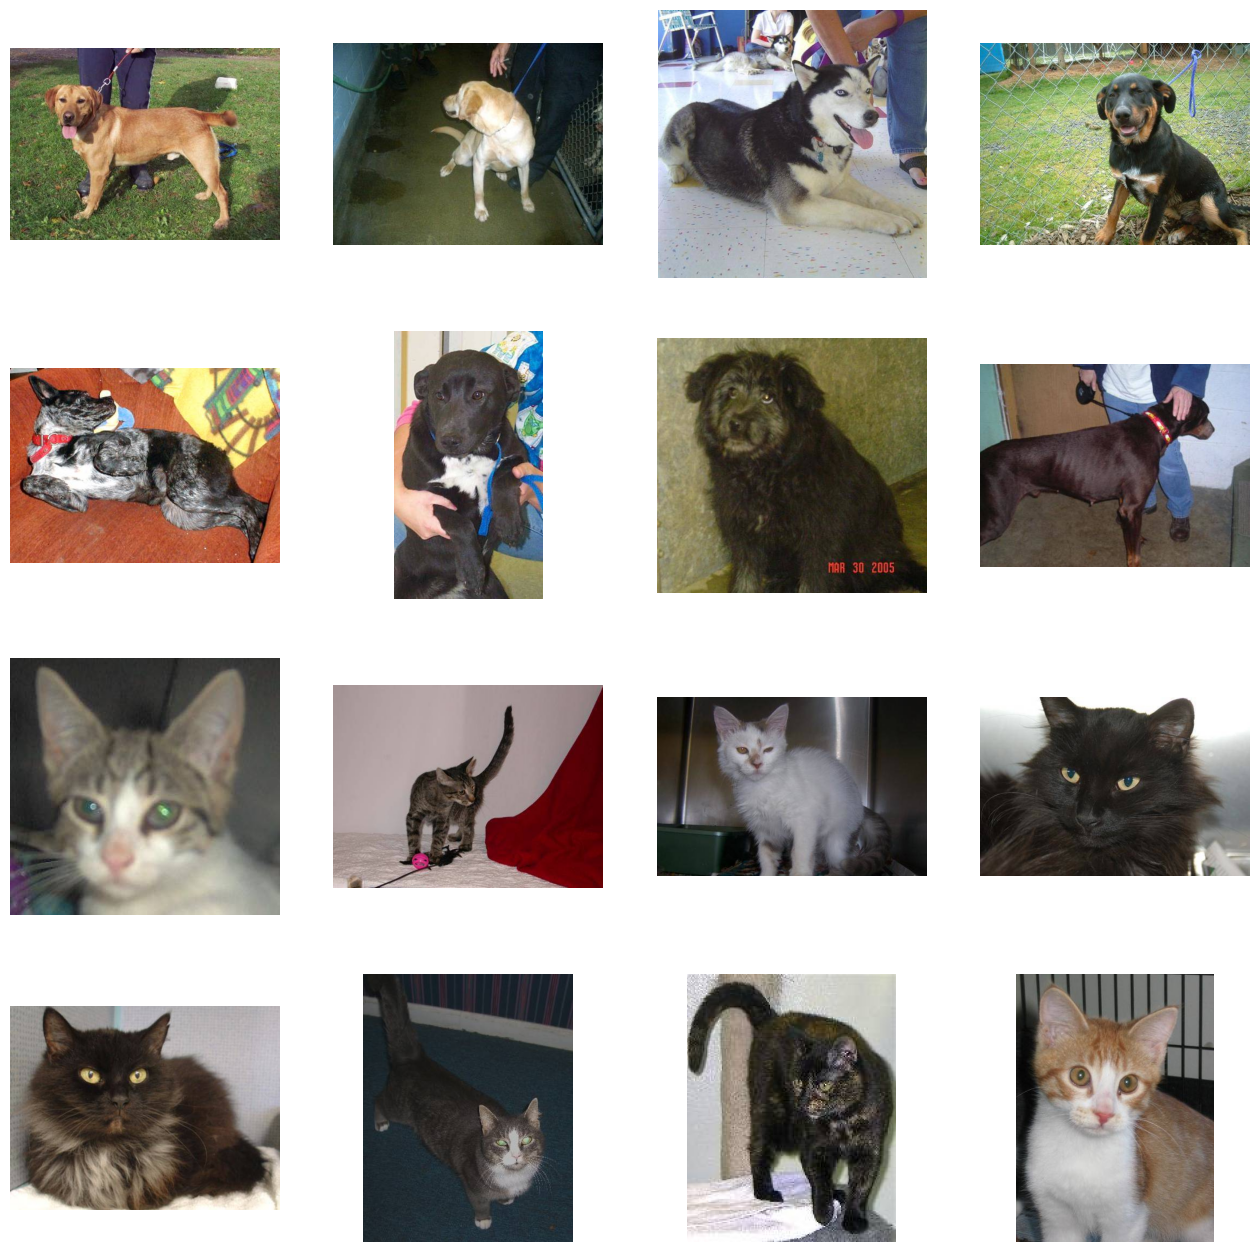

In [6]:
nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_dogs_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dogs_names[pic_index-8:pic_index]]
next_cats_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cats_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_dogs_pix+next_cats_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Data Preprocessing and Model Initialization

### Preprocessing the Training Set with Data Augmentation
In this step, we preprocess the training set images and apply data augmentation techniques to improve the model's generalization capabilities. Data augmentation includes random transformations like shear, zoom, and horizontal flip. These transformations help the model learn from a more diverse set of images, reducing the risk of overfitting.

### Preprocessing the Validation Set
For the validation set, we only apply rescaling to normalize the pixel values. Unlike the training set, we don't apply data augmentation to the validation set, as it's used to evaluate the model's performance on unseen data.

### Initializing and Building the Convolutional Neural Network (CNN)
We initialize the CNN as a sequential model, allowing us to stack layers in a linear fashion. The model consists of the following layers:

1. **Convolutional Layers:** We use three convolutional layers with increasing numbers of filters (64, 64, and 128). These layers are responsible for extracting features from the input images. Each convolutional layer is followed by a ReLU activation function to introduce non-linearity.

2. **Pooling Layers:** After each convolutional layer, we add a max-pooling layer with a pool size of 2x2. Pooling layers reduce the spatial dimensions of the feature maps, making the model more computationally efficient and robust to variations in the input.

3. **Flattening:** Before connecting to the fully connected layers, we flatten the output from the convolutional and pooling layers. This step converts the 2D feature maps into a 1D vector.

4. **Fully Connected Layer:** We add a dense layer with 256 neurons and a ReLU activation function. This layer serves as a classifier that uses the extracted features to make predictions.

5. **Dropout:** To further prevent overfitting, we include a dropout layer with a rate of 0.5. Dropout randomly sets a fraction of the input units to zero during training, which helps in regularizing the model.

6. **Output Layer:** The final layer is a dense layer with a single neuron and a sigmoid activation function. Since this is a binary classification task (dog vs. cat), the output layer provides the probability of the input image being a dog.

### Compilation of the CNN
We compile the CNN using the Adam optimizer with a learning rate of 0.001. The loss function used is binary crossentropy, suitable for binary classification tasks. We also track the accuracy metric during training to monitor the model's performance.

### Model Summary
Finally, we generate a summary of the CNN, which provides an overview of the model's architecture, including the number of parameters in each layer and the total number of trainable parameters in the model.

In [7]:
# Preprocessing the training set and applying data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('Classification/training_set/training_set/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [8]:
# Preprocessing the validation set
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_set = test_datagen.flow_from_directory('Classification/validation_set/validation_set/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [9]:
# Initializing the CNN
cnn = tf.keras.models.Sequential()

# Create the first Convolutional Layer with increased filters
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Create a Pooling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Create the second Convolutional Layer with increased filters
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))

# Add another Pooling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Add a third Convolutional Layer
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flatten the results to feed into the CNN
cnn.add(tf.keras.layers.Flatten())

# Fully Connected Convolutional Neural Network with increased neuron hidden layer
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

# Add Dropout to prevent overfitting
cnn.add(tf.keras.layers.Dropout(0.5))

# Creating the Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the CNN with adjusted learning rate
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the enhanced CNN
cnn.summary()

/home/fonta42/anaconda3/envs/computer_vision_projects/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-03-29 15:39:42.638487: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-29 15:39:42.642117: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required li

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,292,737 (4.93 MB)

 Trainable params: 1,292,737 (4.93 MB)

 Non-trainable params: 0 (0.00 B)

## Training, Evaluation, and Visualization

### Training the CNN
In this step, we train our CNN on the training set for 100 epochs. During training, the model learns to distinguish between images of dogs and cats by adjusting its weights based on the training data. We also use the validation set to evaluate the model's performance at the end of each epoch, which helps us monitor its generalization capabilities.

### Saving the Trained Model
After training, we save the model to disk as a `.keras` file. This allows us to reload the trained model later for inference or further training without having to retrain it from scratch.

### Evaluating the CNN on the Validation Set
We evaluate the trained CNN on the validation set to assess its performance on unseen data. The evaluation provides us with several metrics, including validation loss, accuracy, precision, and recall. These metrics give us insights into how well the model is performing in terms of correctly classifying images and handling false positives and negatives.

### Calculating the F1-Score
The F1-score is a harmonic mean of precision and recall, providing a single metric that balances the two. It's particularly useful when the class distribution is imbalanced. We calculate and print the F1-score to get an overall sense of the model's performance.

### Visualizing Predictions with Metrics
To better understand the model's predictions, we define a function `plot_images_with_metrics` that plots a set of images from the validation set along with their true labels, predicted classes, and probabilities of being a cat or dog. This visualization helps us see not only which images the model is getting right or wrong but also how confident it is in its predictions.

### Displaying Images with Predictions and Probabilities
Finally, we use the `plot_images_with_metrics` function to display a batch of images from the validation set along with the model's predictions and probabilities. This provides a visual representation of the model's performance and its ability to generalize to new data.

In [11]:
#Training our CNN on the training set and evaluating it on the test set
cnn.fit(x = training_set, validation_data = validation_set, epochs = 100)

Epoch 1/100


/home/fonta42/anaconda3/envs/computer_vision_projects/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 26s 99ms/step - accuracy: 0.5160 - loss: 0.6905 - val_accuracy: 0.6510 - val_loss: 0.6463
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - accuracy: 0.6121 - loss: 0.6514 - val_accuracy: 0.6850 - val_loss: 0.5860
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - accuracy: 0.6778 - loss: 0.5954 - val_accuracy: 0.7115 - val_loss: 0.5669
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.6924 - loss: 0.5729 - val_accuracy: 0.7105 - val_loss: 0.5791
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 99ms/step - accuracy: 0.7324 - loss: 0.5348 - val_accuracy: 0.7460 - val_loss: 0.5110
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - accuracy: 0.7475 - loss: 0.5043 - val_accuracy: 0.7650 - val_loss: 0.4929
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 96ms/step - accuracy: 0.7604 - loss: 0.4921 - val_accuracy: 0.7720 - val_loss: 0.4669
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - accuracy: 0.7723 - loss: 0.4722 - val_

In [13]:
cnn.save('./cnn.keras')

In [31]:
# Evaluate the CNN on the validation set
val_loss, val_accuracy, val_precision, val_recall = cnn.evaluate(validation_set)

print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')
print(f'Validation Precision: {val_precision}')
print(f'Validation Recall: {val_recall}')

# Calculate F1-score
val_f1_score = 2 * (val_precision * val_recall) / (val_precision + val_recall)
print(f'Validation F1-Score: {val_f1_score}')


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8611 - loss: 0.6608 - precision: 0.8217 - recall: 0.9237
Validation Loss: 0.6840828657150269
Validation Accuracy: 0.847000002861023
Validation Precision: 0.8059964776039124
Validation Recall: 0.9139999747276306
Validation F1-Score: 0.8566073019068462


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


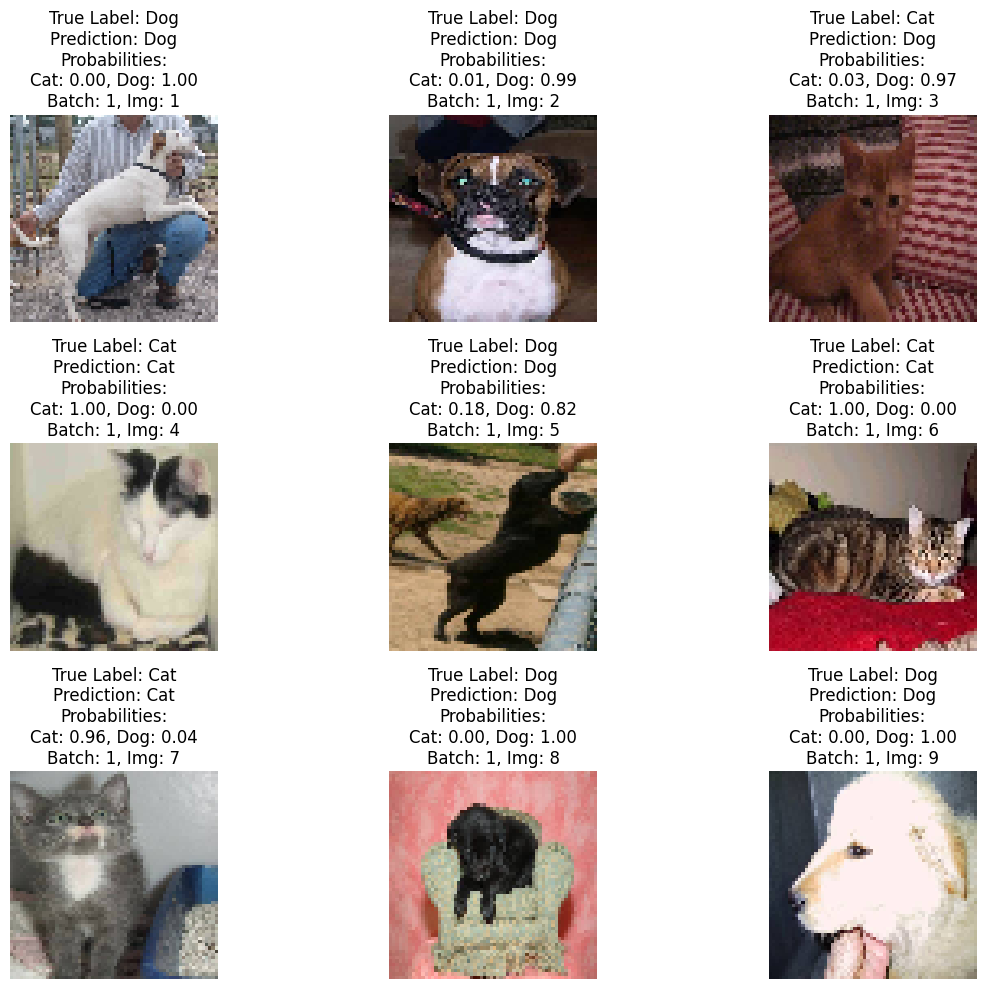

In [37]:
def plot_images_with_metrics(images, labels, predictions, num_images=9, batch_num=1):
    plt.figure(figsize=(12, 10))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        # Convert prediction to class and probability
        pred_class = 'Dog' if predictions[i][0] > 0.5 else 'Cat'
        pred_prob_dog = predictions[i][0]
        pred_prob_cat = 1 - predictions[i][0]
        ground_truth = 'Dog' if int(labels[i]) > 0.5 else 'Cat'
        plt.title(
            f'True Label: {ground_truth}\n'
            f'Prediction: {pred_class}\n'
            f'Probabilities:\n'
            f'Cat: {pred_prob_cat:.2f}, '
            f'Dog: {pred_prob_dog:.2f}\n'
            f'Batch: {batch_num}, Img: {i + 1}')

        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    
# Number of batches to display
num_batches = 1

# Generate and plot images with predictions and probabilities for multiple batches
for batch_num in range(1, num_batches + 1):
    val_images, val_labels = next(validation_set)
    predictions = cnn.predict(val_images)

    # Plot images with predictions and probabilities
    plot_images_with_metrics(val_images, val_labels, predictions, num_images=9, batch_num=batch_num)
